In [ ]:
import pandas as pd
import numpy as np

!unzip /content/drive/MyDrive/household_power_consumption.zip

Archive:  /content/drive/MyDrive/household_power_consumption.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: household_power_consumption.txt  


In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [ ]:
df.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df = df.astype('float64')

In [ ]:
y = df.Global_active_power.copy()

#### Question 11

Question 11
Resample the data from a minute sampling rate to a daily sampling rate (i.e sum over the minutes for each day). Also, fill all the missing values with the mean (average) of their attribute/column. Which of the following is a plot of the daily global_active_power over time?

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

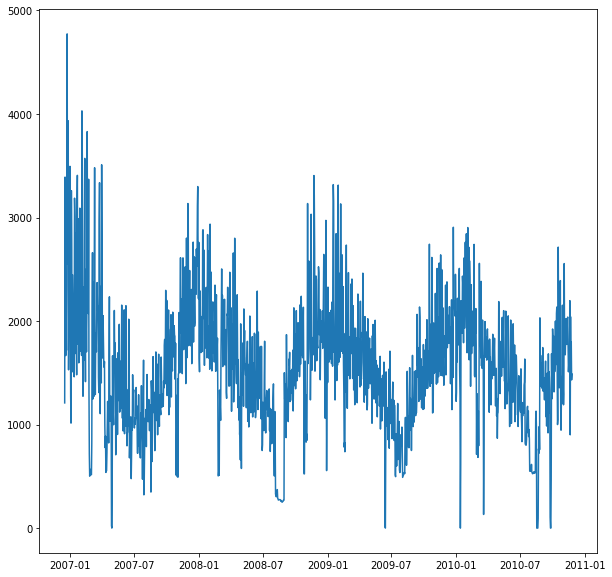

In [ ]:
df_resampled = df.resample('D').sum()
df_resampled = df_resampled.fillna('mean')
plt.figure(figsize=(10, 10))
plt.plot(df_resampled.index, df_resampled.Global_active_power,)
plt.show()

#### Question 12

What is the Pearson correlation coefficient between the global_active_power and global_reactive_power? To 2 decimal places.

In [ ]:
corr = df_resampled['Global_active_power'].corr(df_resampled['Global_reactive_power'], method='pearson')
round(corr, 2)

0.13

#### Question 13

What is the Pearson correlation coefficient between the Voltage and global_intensity? To 2 decimal places

In [ ]:
corr2 = df_resampled['Global_intensity'].corr(df_resampled['Voltage'])
round(corr2, 2)

0.27

#### Question 14

Using the daily sampling rate (sum), divide the data into a train and test set. The last 365 days is your test set and the first (x-365) days is your training set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series modeling using this time column (‘dt’ or ‘ds’) and the global_active_power (or ‘y’). Answer question 14 - 16

Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?

In [ ]:
len(df_resampled)

1442

In [ ]:
1442-365

1077

In [ ]:
train = df_resampled.iloc[:1077, :]
test = df_resampled.iloc[:365, :]
train.shape, test.shape

((1077, 7), (365, 7))

In [ ]:
from fbprophet import Prophet

In [ ]:
train.reset_index(inplace = True)
train.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [ ]:
test.reset_index(inplace=True)

In [ ]:
X_train = train['datetime'].copy()
y_train = train['Global_active_power'].copy()
X_test = test['datetime'].copy()
y_test = test['Global_active_power'].copy()

In [ ]:
model = Prophet()
df_train = pd.DataFrame(data=list(zip(X_train, y_train)), columns=['ds', 'y']) 
model.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_test = pd.DataFrame(data=list(zip(X_test, y_test)), columns=['ds', 'y']) 
forecast = model.predict()

In [ ]:
def Metric(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)  / y_true)) * 100

In [ ]:
MAPE = Metric(df_test[''], forecast['yhat'])
round(MAPE, 2)

UFuncTypeError: ignored

#### Question 15

What is the RMSE in 2 decimal places?

In [ ]:
from sklearn import metrics
round(np.sqrt(metrics.mean_squared_error(df_test['y'],forecast['yhat'])), 2)

ValueError: ignored

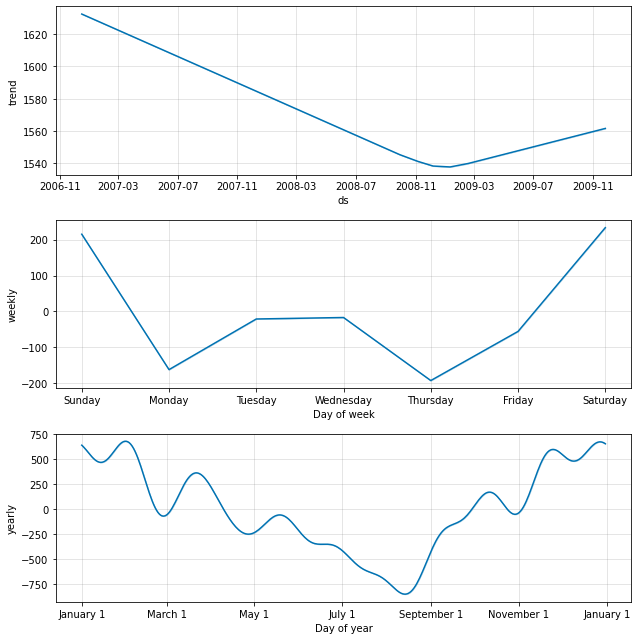

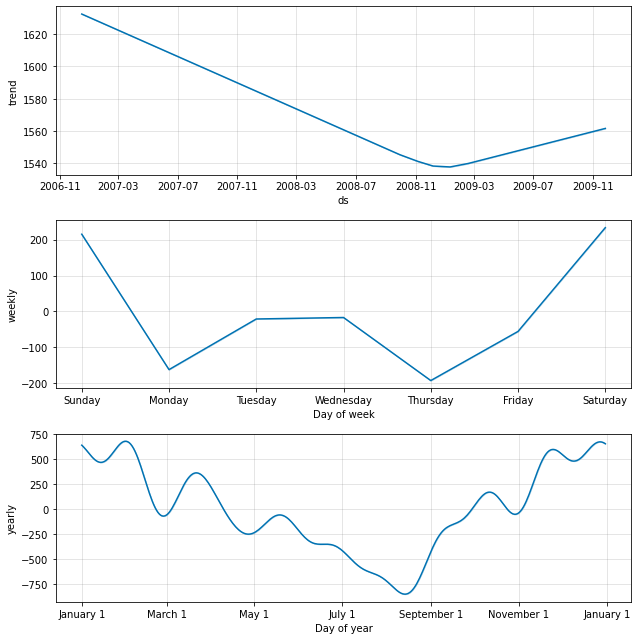

In [ ]:
model.plot_components(forecast)

#### Question 17

Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the six independent variables ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'] will be [‘add1’, ‘add2’, ‘add3’, ‘add4’, ‘add5’, ‘add6’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last 365 days of the house consumption (‘global_active_power’). Answer question 17-19:

Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?

In [ ]:
df_resampled.reset_index(inplace=True)
new_df = df_resampled.rename(columns = {'datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [ ]:
Train = new_df.iloc[:1077,:]
Test = new_df.iloc[1077:,:]
Test.shape, Train.shape

((365, 8), (1077, 8))

In [ ]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [ ]:
model = model.fit(Train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prediction = model.predict(Test)

In [ ]:
round(Metric(Test['y'], prediction['yhat']), 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in true_divide



inf

In [ ]:
round(np.sqrt(metrics.mean_squared_error(Test['y'],prediction['yhat'])), 2)

38.32

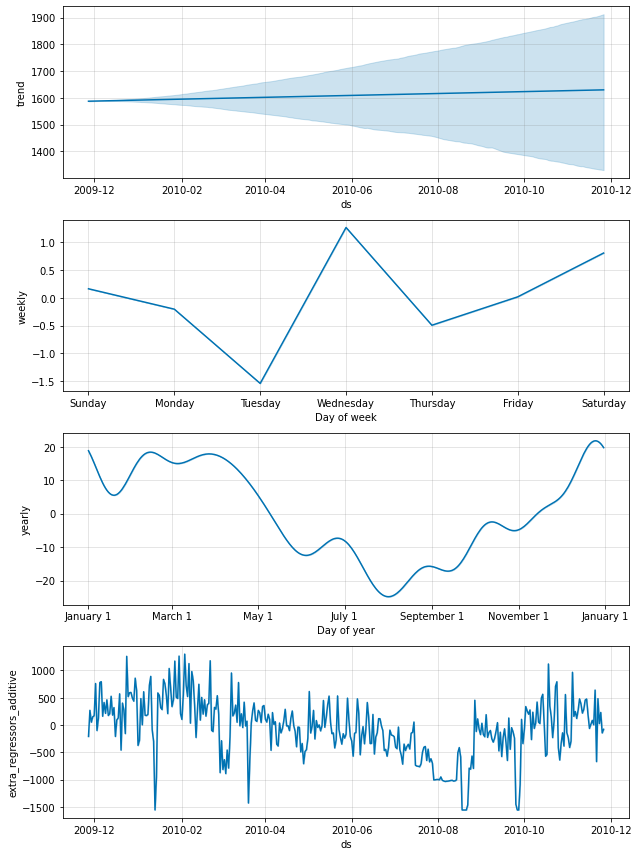

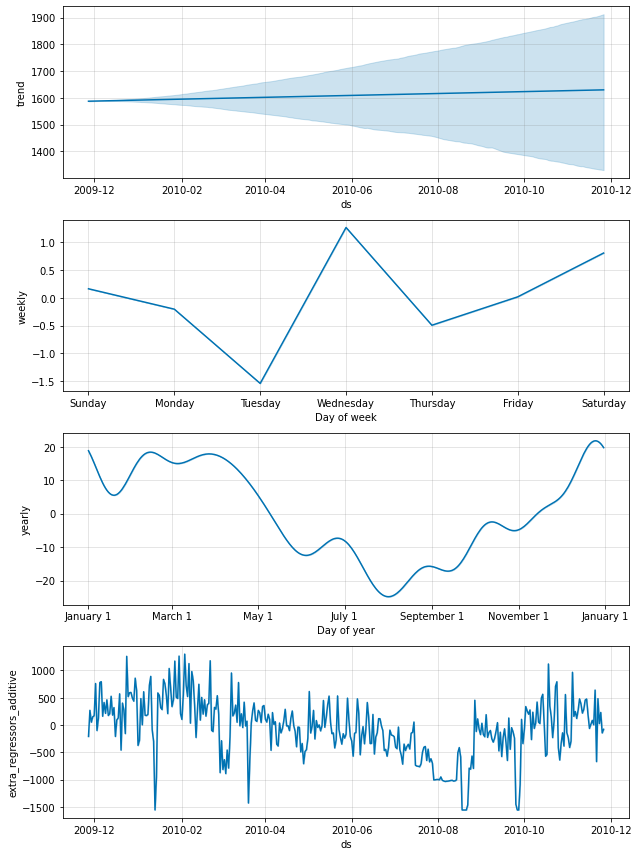

In [ ]:
model.plot_components(prediction)